In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn.functional as F
import torchvision.datasets
import torch.optim as optim
import numpy as np
import torchvision.datasets as datasets

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

train_data = datasets.CIFAR10('data', train=True, transform=transform, download=True)
test_data = datasets.CIFAR10('data', train=False, transform=transform, download=True)

100%|██████████| 170498071/170498071 [00:03<00:00, 48212244.03it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [3]:
num_train = len(train_data)
indicies = list(range(num_train))
np.random.shuffle(indicies)
split = int(np.floor(0.2*num_train))
train_idx, valid_idx = indicies[split:], indicies[:split]

In [4]:
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

In [5]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size= 20, sampler=train_sampler)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size= 20, sampler=valid_sampler)
test_loader = torch.utils.data.DataLoader(test_data, batch_size= 20)

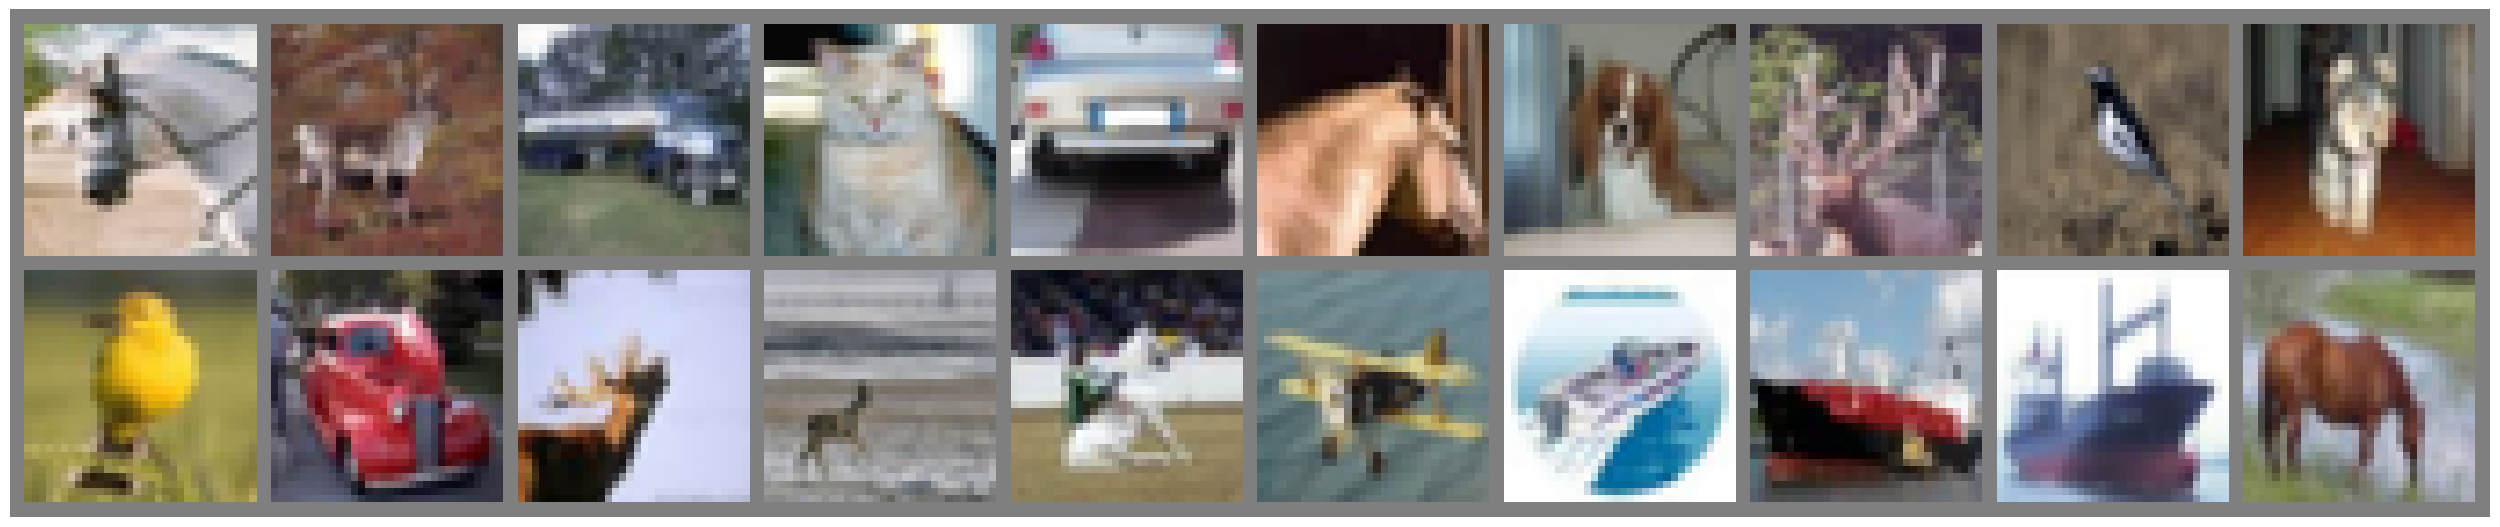

In [6]:
import matplotlib.pyplot as plt
import torchvision

def imshow(image):
    if isinstance(image, torch.Tensor):
        image = image.numpy().transpose((1,2,0))
    else:
        image = np.array(image).transpose((1, 2, 0))


    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    image = std * image + mean
    image = np.clip(image,0,1)
    fig, ax = plt.subplots(1,1, figsize = (32,32))

    plt.imshow(image)
    ax.axis('off')



images, _ = next(iter(train_loader))
out = torchvision.utils.make_grid(images,nrow=10)
imshow(out)

In [7]:
for images, Labels in train_loader:
  print(images.shape)
  break

torch.Size([20, 3, 32, 32])


In [8]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, padding=1, stride=1)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(12,24, kernel_size=3, padding=1, stride=1)
        self.fc1 = nn.Linear(24 * 16 * 16, 256)
        self.fc2 = nn.Linear(256, 256)
        self.out = nn.Linear(256, 10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = self.pool(X)
        X = F.relu(self.conv2(X))
        X = X.view(X.size(0), -1)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        out = self.out(X)
        return X


model = NeuralNetwork()



In [9]:
num_epochs = 5
num_classes = 10
learning_rate = 0.001

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
best_acc=0.0

for epoch in range (num_epochs):
  model.train()
  train_accuracy = 0.0
  train_loss=0.0
  for i, (images, labels) in enumerate(train_loader):
    optimizer.zero_grad()
    output = model(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    train_loss += loss.cpu().data*images.size(0)
    _, prediction = torch.max(output.data, 1)
    train_accuracy += int(torch.sum(prediction == labels.data))
  train_accuracy = train_accuracy/len(train_loader.dataset)
  train_loss = train_loss/len(train_loader.dataset)


  model.eval()
  test_accuracy = 0.0
  for i, (images, labels) in enumerate(test_loader):
     output = model(images)
     _, prediction = torch.max(output.data, 1)
     test_accuracy += int(torch.sum(prediction == labels.data))
  test_accuracy = test_accuracy/len(test_loader.dataset)
  print(f'Epoch:{epoch+1}, Train_loss: {train_loss:.4f}, Train_accuracy: {train_accuracy:.2f}, Test_accuracy: {test_accuracy:.2f}')



  if test_accuracy > best_acc:
     torch.save(model.state_dict(), 'best_performing.model')
     best_acc = test_accuracy





Epoch:1, Train_loss: 2.4042, Train_accuracy: 0.30, Test_accuracy: 0.42
Epoch:2, Train_loss: 2.1608, Train_accuracy: 0.37, Test_accuracy: 0.46
Epoch:3, Train_loss: 2.0442, Train_accuracy: 0.40, Test_accuracy: 0.47
